In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X = housing.data
Y = housing.target
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df.columns = housing.feature_names
df['houseAge-houseAge'] = df.HouseAge**2 ## complex boundaries 

In [8]:
df.head()
X2 = df.values ## getting all  x input data of new dataframe 
X.shape,X2.shape

((20640, 8), (20640, 9))

In [9]:
df.isnull().sum()

MedInc               0
HouseAge             0
AveRooms             0
AveBedrms            0
Population           0
AveOccup             0
Latitude             0
Longitude            0
houseAge-houseAge    0
dtype: int64

# splitting the data

In [10]:
from sklearn import model_selection

In [11]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,random_state = 0)
X2_train,X2_test,Y2_train,Y2_test = model_selection.train_test_split(X2,Y,random_state = 0)
X2_train

array([[   7.3003    ,   19.        ,    7.9616    , ...,   38.46      ,
        -122.68      ,  361.        ],
       [   5.9547    ,   18.        ,    6.5473251 , ...,   32.95      ,
        -117.24      ,  324.        ],
       [   3.2125    ,   19.        ,    5.20754717, ...,   34.68      ,
        -118.27      ,  361.        ],
       ...,
       [   3.1977    ,   31.        ,    3.64122137, ...,   36.58      ,
        -121.9       ,  961.        ],
       [   5.6315    ,   34.        ,    4.54059829, ...,   33.62      ,
        -117.93      , 1156.        ],
       [   1.3882    ,   15.        ,    3.9295302 , ...,   32.8       ,
        -115.56      ,  225.        ]])

# training the model


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
algo = LinearRegression()
algo2 = LinearRegression()

In [14]:
algo.fit(X_train,Y_train)
algo2.fit(X2_train,Y2_train)

LinearRegression()

In [23]:
Y_predict = algo.predict(X_test)
Y2_predict = algo2.predict(X2_test)
Y_predict

array([2.27826207, 2.79606672, 1.90887117, ..., 2.15678592, 3.03507742,
       2.89088222])

In [16]:
score1 = algo.score(X_test,Y_test)
score2 = algo2.score(X2_test,Y2_test)
score1,score2

(0.5911695436410473, 0.5922731836445165)

# comparing Y_predict and Y_test

In [17]:
import matplotlib.pyplot as plt

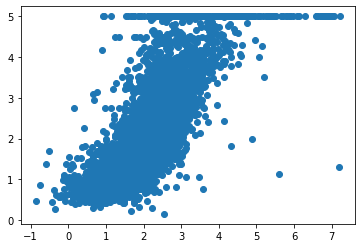

In [18]:
plt.scatter(Y_predict,Y_test)
plt.show()

## the above model isnt accurate as the plots are much away from the linear line